#  Project-1 --> Credit Card Fraud Detection

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import train_test_split # train-test-splitting

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# **Step-1 : Data Collection**

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284806, 31)

In [4]:
df.head() # first 5 rows of data frame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info() # informations about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

# **Step-2 : Data Preprocessing**

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

In [8]:
df=df.drop_duplicates(keep='first') # removing dulicates

In [9]:
df['Class'].value_counts()

0    283252
1       473
Name: Class, dtype: int64

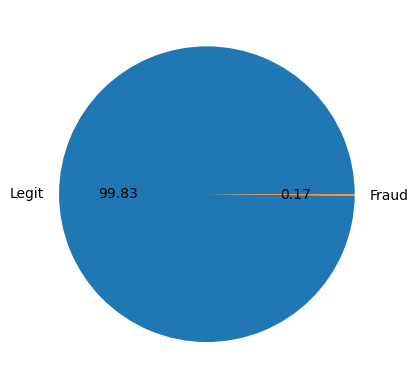

In [10]:
plt.pie(df['Class'].value_counts(),labels=['Legit','Fraud'],autopct="%0.2f")
plt.show()

*****Here we can see that the data is highly imbalanced so we have to balance it to get good result**

In [11]:
df[df['Class']==0][['Amount']].describe() # for legit transactions

,Amount
count,283252.000000
mean,88.413121
std,250.379348
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


In [12]:
df[df['Class']==1][['Amount']].describe() # for fraud transactions

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94834.782872,0.013441,-0.009829,0.012851,-0.010438,0.006769,0.001253,0.010441,-0.002446,0.002611,...,-0.000490,-0.001151,-0.000162,0.000358,0.000393,-0.000299,0.000068,0.001409,0.000417,88.413121
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# **Step-3 : Under Sampling**

In [14]:
# splitting into two different data set of legit and fraud transactions
legit=df[df['Class']==0]
fraud=df[df['Class']==1]

*****as there are more values in legit dataset so here we only take number of observations equal to fraud dataset**

In [15]:
legit_sample=legit.sample(n=473) # sampling legit dataset

In [16]:
sample_dataset=pd.concat([legit_sample,fraud],axis=0) # new dataset after under sampling

In [17]:
sample_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

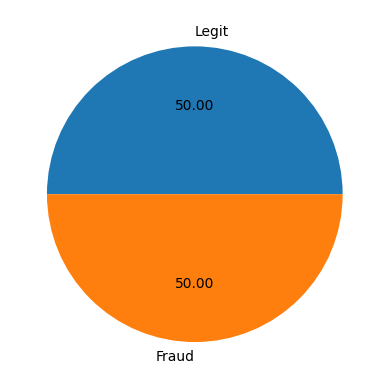

In [18]:
plt.pie(sample_dataset['Class'].value_counts(),labels=['Legit','Fraud'],autopct="%0.2f")
plt.show()

In [19]:
sample_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95992.729387,0.009067,-0.081591,-0.009366,-0.144584,0.012688,0.020550,-0.045577,0.017552,0.021656,...,0.025986,-0.003098,0.028922,-0.004742,0.038411,-0.010524,0.032069,0.022318,0.004733,86.224186
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


*****here we can see after under sampling the nature of the dataset doesn't change so much**

# **Step-4 : Model Training and predictions**

In [20]:
X=sample_dataset.drop(columns='Class',axis=1)
Y=sample_dataset['Class']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [22]:
# at first here we are using LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression(solver='liblinear', penalty='l1')

In [24]:
# training the model
lr.fit(X_train,Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
# checking accuracy,confusion matrix and precission score
Y_pred=lr.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))

0.9421052631578948
[[90  5]
 [ 6 89]]
0.9468085106382979


# **Step-5 : Testing with different models**

In [26]:
# all imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# all object creation
lr=LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [27]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [28]:
# function to calculate accuracy and precision score for each model in clf
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [29]:
# storing all accuracy and precision scores
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [30]:
# comparing all the models performance
performance_df

,Algorithm,Accuracy,Precision
6,BgC,0.942105,0.977273
4,RF,0.936842,0.977011
8,GBDT,0.947368,0.967033
7,ETC,0.936842,0.966292
0,LR,0.942105,0.946809
3,DT,0.931579,0.945652
5,AdaBoost,0.931579,0.927083
2,KN,0.557895,0.553398
1,SVC,0.500000,0.500000


*****so here after comparing all the different algorithms we can see that BaggingClassifier has the highest precision score so we will use this algorithm for our model**

# **Step-6 : Saving the model**

In [32]:
import pickle

In [34]:
pickle.dump(bc,open('model.pkl','wb')) # saving BaggingClassifier model